In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('day13.txt') as f:
    dots = []
    commands = []
    for line in f:
        if line[0].isdigit():
            dots.append(line.rstrip().split(','))
        if line[0] == 'f':
            commands.append(line[11]) #only need x or y

dots = np.array(dots, dtype=int)

In [3]:
class TPage:
    def __init__(self, dots, commands = []):
        shape = (max(dots[:,0])+1, max(dots[:,1])+1)
        self.dots = np.zeros(shape, dtype=bool)
        self.dots[tuple(dots.T)] = True
        self.commands = commands.copy()
    
    @property
    def ndots(self):
        return np.count_nonzero(self.dots)
    
    @property
    def shape(self):
        return self.dots.shape
    
    def foldx(self):
        ax = self.shape[0]//2
        left, right = self.dots[:ax], self.dots[ax+1:]
        self.dots = np.logical_or(left, right[::-1])
        
    def foldy(self):
        ax = self.shape[1]//2
        up, down = self.dots[:,:ax], self.dots[:,ax+1:]
        self.dots = np.logical_or(up, down[:,::-1])
        
    def fold(self, d):
        #print('folding '+d)
        if d == 'x':
            self.foldx()
        if d == 'y':
            self.foldy()
            
    def next(self):
        self.fold(self.commands.pop(0))
    
    def run(self):
        while len(self.commands) > 0:
            self.next()
    
    def show(self):
        plt.imshow(self.dots.T, origin='upper')
    
    def print(self):
        for l in self.dots.T:
            print(plothelp(l))
        
def plothelp(brow, t='0', f=' '):
    line = ''
    for b in brow:
        if b:
            line += t
        else:
            line += f
    return line

In [4]:
firstpage = TPage(dots, commands)

In [5]:
firstpage.next()
firstpage.ndots

704

In [6]:
firstpage.run()

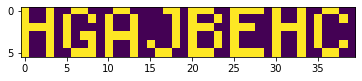

In [7]:
firstpage.show()

In [8]:
firstpage.print()

0  0  00   00    00 000  0000 0  0  00  
0  0 0  0 0  0    0 0  0 0    0  0 0  0 
0000 0    0  0    0 000  000  0000 0    
0  0 0 00 0000    0 0  0 0    0  0 0    
0  0 0  0 0  0 0  0 0  0 0    0  0 0  0 
0  0  000 0  0  00  000  0000 0  0  00  
